In [5]:
import os
import pandas as pd
import librosa
from librosa import display
import numpy as np
import IPython.display as ipd
from glob import glob
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# this code used to calculate the duration of each file and then 
# create the list of audios that their duration more than 45secs

# import wave
# import contextlib
# files_duration = []
# for fname in sorted(os.listdir("recordings/wav")):
#     #fname = 'recordings/wav/afrikaans2.wav'
#     with contextlib.closing(wave.open("recordings/wav/"+fname,'r')) as f:
#         frames = f.getnframes()
#         rate = f.getframerate()
#         duration = frames / float(rate)
#         files_duration.append(duration)
        
#files_duration = np.array(files_duration)

# files_name_indices = np.argwhere(files_duration>45).reshape(81)
# files_name_indices

# files_name = pd.DataFrame(sorted(os.listdir("recordings")))
# files_to_drop_out = files_name.iloc[files_name_indices][0].tolist() #have more that 45secs duration

# with open('recordings_to_be_deleted.txt', 'w') as f:
#     for i in to_drop_out:
#         f.write('%s\n' % i)


In [6]:
data = pd.read_csv('speakers_all.csv')
data

age  age_onset              birthplace  filename native_language  \
0     24.0       12.0         koussi, senegal   balanta         balanta   
1     18.0       10.0          buea, cameroon  cameroon        cameroon   
2     48.0        8.0  hong, adamawa, nigeria  fulfulde        fulfulde   
3     42.0       42.0   port-au-prince, haiti   haitian         haitian   
4     40.0       35.0   port-au-prince, haiti   haitian         haitian   
...    ...        ...                     ...       ...             ...   
2167  46.0        5.0          lagos, nigeria   yoruba3          yoruba   
2168  46.0       12.0          lagos, nigeria   yoruba4          yoruba   
2169  47.0        2.0         ibadan, nigeria   yoruba5          yoruba   
2170  31.0        1.0     bethel, alaska, usa    yupik1           yupik   
2171  24.0       14.0      bulawayo, zimbabwe     zulu1            zulu   

         sex  speakerid   country  file_missing?  Unnamed: 9  Unnamed: 10  \
0       male        788   senegal           True         NaN          NaN   
1       male       1953  cameroon           True         NaN          NaN   
2       male       1037   nigeria           True         NaN          NaN   
3       male       1165     haiti           True         NaN          NaN   
4       male       1166     haiti           True         NaN          NaN   
...      ...        ...       ...            ...         ...          ...   
2167  female        766   nigeria          False         NaN          NaN   
2168    male        851   nigeria          False         NaN          NaN   
2169  female       2023   nigeria          False         NaN          NaN   
2170  female        571       usa          False         NaN          NaN   
2171  female        406  zimbabwe          False         NaN          NaN   

     Unnamed: 11  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN  
...          ...  
2167         NaN  
2168         NaN  
2169         NaN  
2170         NaN  
2171         NaN  

[2172 rows x 12 columns]

In [7]:
data = data[data["file_missing?"]==False][["age","age_onset","birthplace","filename","native_language","sex","country"]]
data

age  age_onset                         birthplace    filename  \
32    27.0        9.0             virginia, south africa  afrikaans1   
33    40.0        5.0             pretoria, south africa  afrikaans2   
34    43.0        4.0  pretoria, transvaal, south africa  afrikaans3   
35    26.0        8.0             pretoria, south africa  afrikaans4   
36    19.0        6.0            cape town, south africa  afrikaans5   
...    ...        ...                                ...         ...   
2167  46.0        5.0                     lagos, nigeria     yoruba3   
2168  46.0       12.0                     lagos, nigeria     yoruba4   
2169  47.0        2.0                    ibadan, nigeria     yoruba5   
2170  31.0        1.0                bethel, alaska, usa      yupik1   
2171  24.0       14.0                 bulawayo, zimbabwe       zulu1   

     native_language     sex       country  
32         afrikaans  female  south africa  
33         afrikaans    male  south africa  
34         afrikaans    male  south africa  
35         afrikaans    male  south africa  
36         afrikaans    male  south africa  
...              ...     ...           ...  
2167          yoruba  female       nigeria  
2168          yoruba    male       nigeria  
2169          yoruba  female       nigeria  
2170           yupik  female           usa  
2171            zulu  female      zimbabwe  

[2140 rows x 7 columns]

In [14]:
native_languages_count = data.pivot_table(index=['native_language'], aggfunc='count')["filename"]
native_languages_count

native_language
afrikaans    5
agni         1
akan         1
albanian     9
amazigh      2
            ..
yapese       1
yiddish      5
yoruba       5
yupik        1
zulu         1
Name: filename, Length: 202, dtype: int64

<h4>Text</h4>
<p>
Please call Stella.  Ask her to bring these things with her from the store:  
Six spoons of fresh snow peas, five thick slabs of blue cheese, and maybe a snack for her brother Bob.  
We also need a small plastic snake and a big toy frog for the kids.  
She can scoop these things into three red bags, and we will go meet her Wednesday at the train station.</p>

In [25]:
audio_path = 'wav_data/arabic102.wav'
ipd.Audio(audio_path)

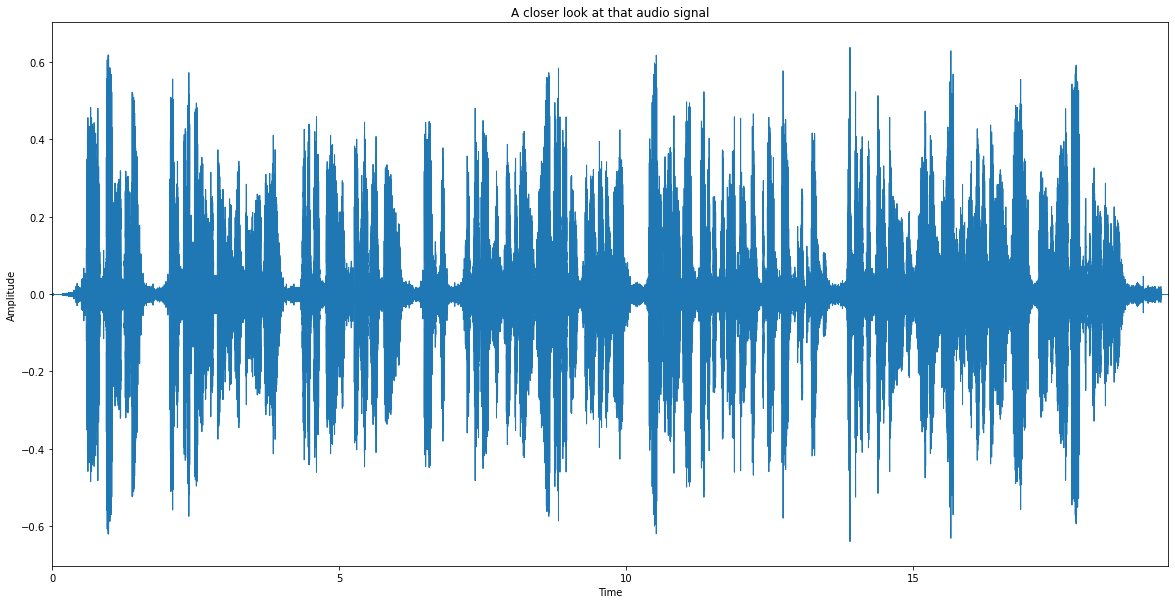

In [26]:
#waveform
plt.figure(figsize=(20, 10))
signal, sr = librosa.load(audio_path, sr=22050)
librosa.display.waveplot(signal, sr=sr)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("A closer look at that audio signal")
plt.show()

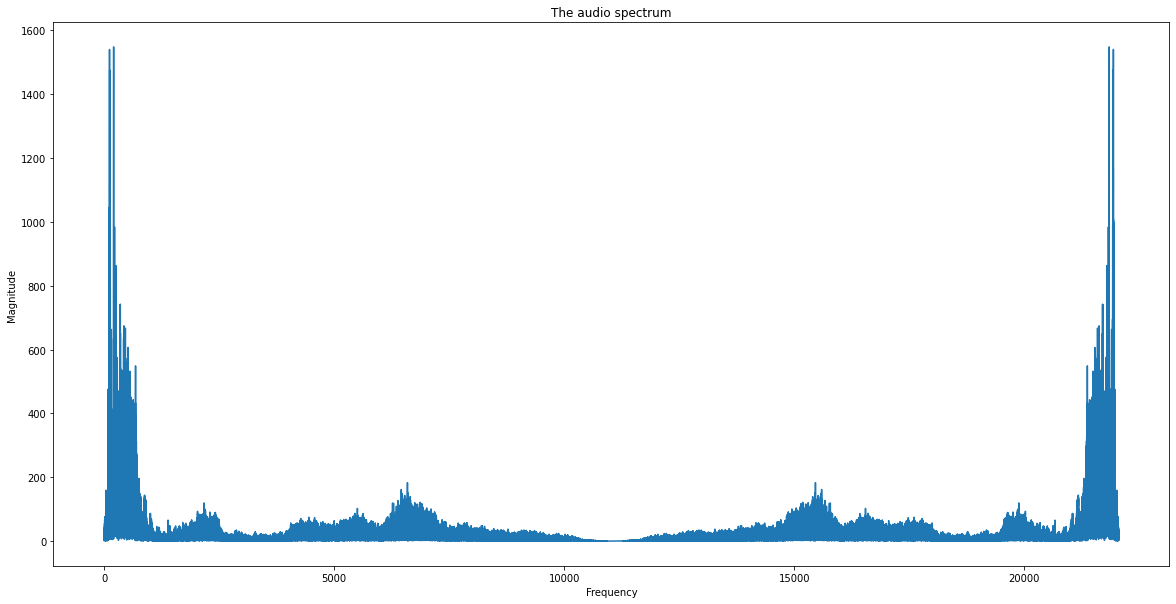

In [31]:
#fft -> spectrum
fft = np.fft.fft(signal)

magnitude = np.abs(fft)
frequency = np.linspace(0, sr, len(magnitude)) #evenly spaced integral of values

plt.figure(figsize=(20, 10))
plt.plot(frequency, magnitude)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("The audio spectrum")
plt.show()

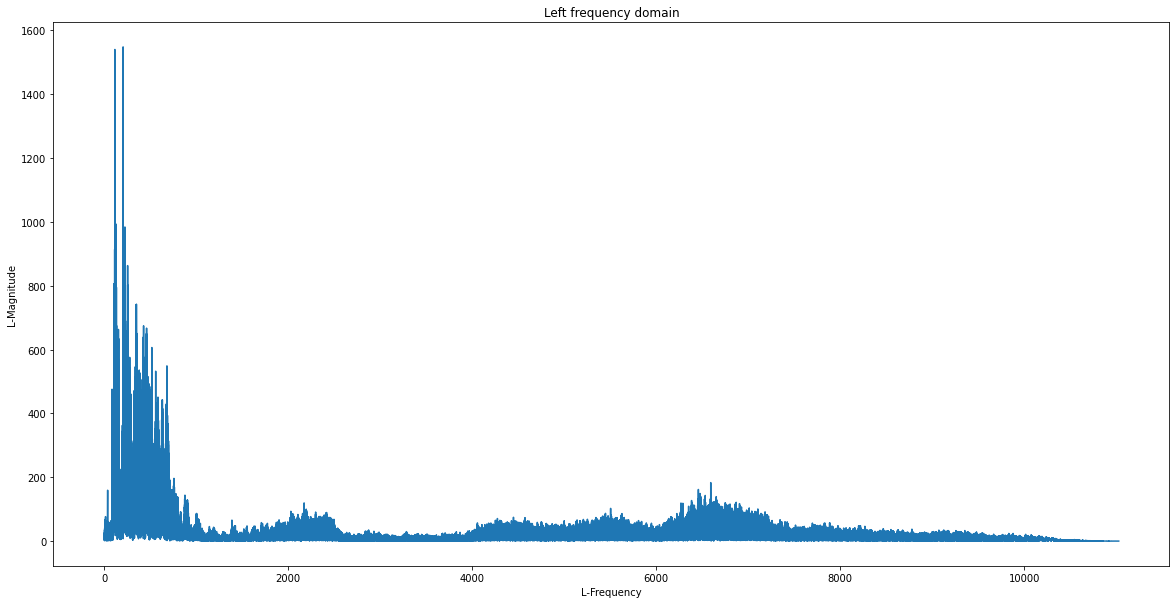

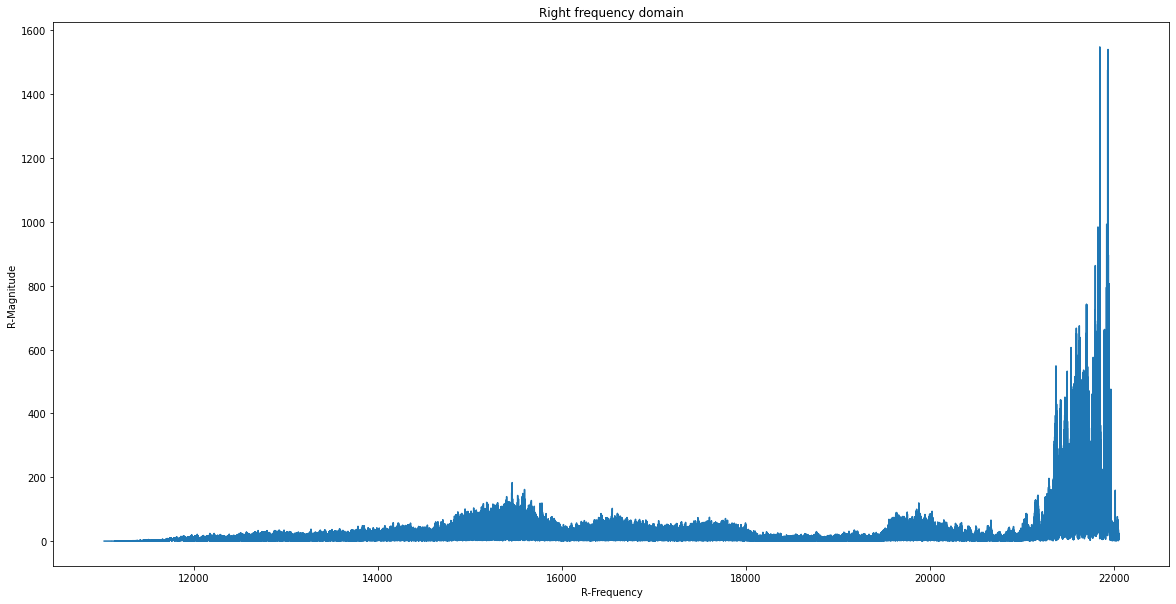

In [30]:
left_frequency = frequency[:int(len(frequency)/2)]
left_magnitude = magnitude[:int(len(magnitude)/2)]

right_frequency = frequency[int(len(frequency)/2):]
right_magnitude = magnitude[int(len(magnitude)/2):]

plt.figure(figsize=(20, 10))
plt.plot(left_frequency, left_magnitude)
plt.xlabel("L-Frequency")
plt.ylabel("L-Magnitude")
plt.title("Left frequency domain")
plt.show()

plt.figure(figsize=(20, 10))
plt.plot(right_frequency, right_magnitude)
plt.xlabel("R-Frequency")
plt.ylabel("R-Magnitude")
plt.title("Right frequency domain")
plt.show()

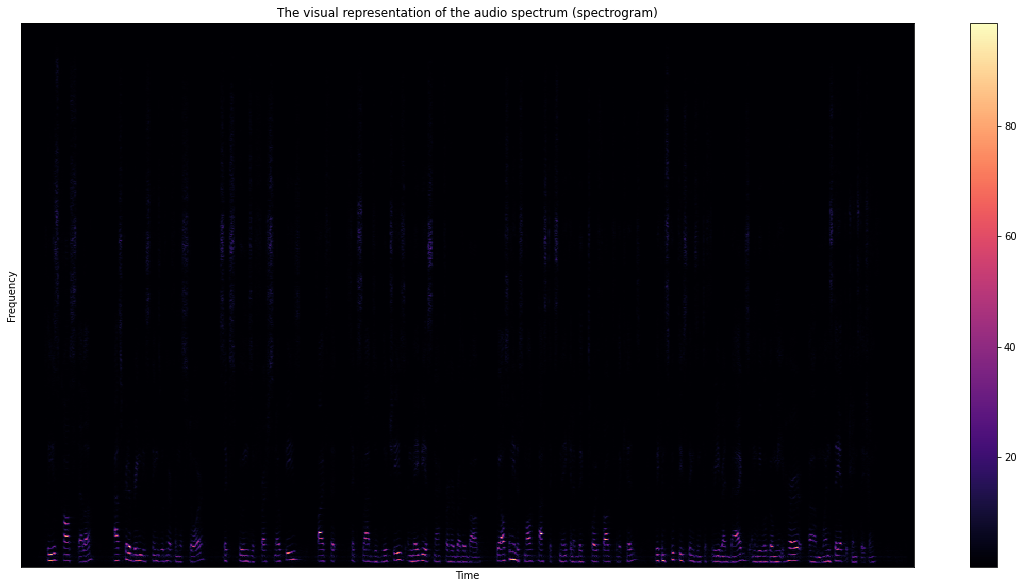

In [35]:
#visual representation of the spectrum => spectrogram
n_fft = 2048
hop_length = 512
stft = librosa.core.stft(signal, hop_length=hop_length, n_fft=n_fft)
spectrogram = np.abs(stft)

plt.figure(figsize=(20, 10))

librosa.display.specshow(spectrogram, sr=sr, hop_length=hop_length)

plt.xlabel("Time")
plt.ylabel("Frequency")
plt.title("The visual representation of the audio spectrum (spectrogram)")
plt.colorbar()
plt.show()

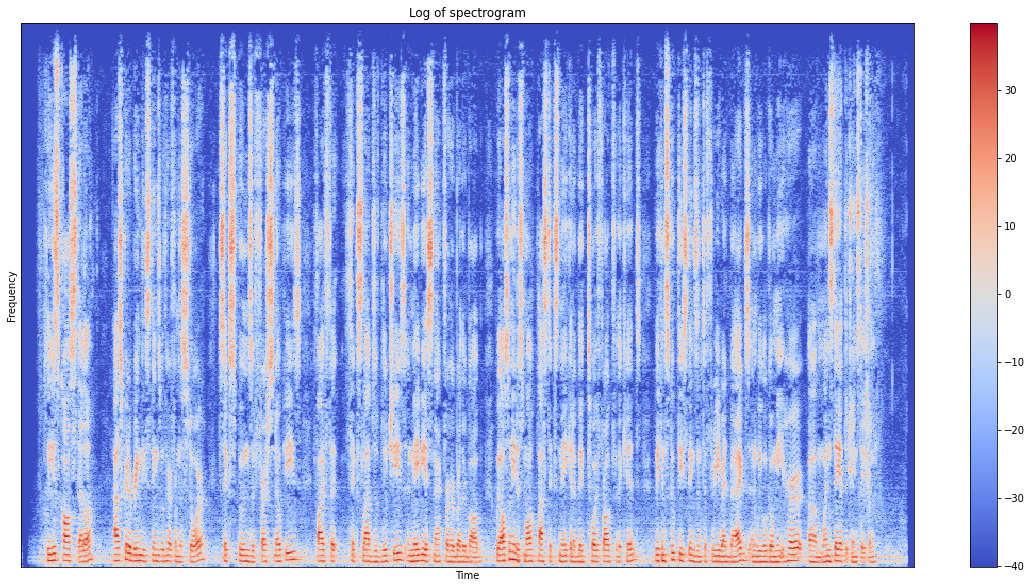

In [36]:
log_spectrogram = librosa.amplitude_to_db(spectrogram)
plt.figure(figsize=(20, 10))

librosa.display.specshow(log_spectrogram, sr=sr, hop_length=hop_length)

plt.xlabel("Time")
plt.ylabel("Frequency")
plt.title("Log of spectrogram")
plt.colorbar()
plt.show()

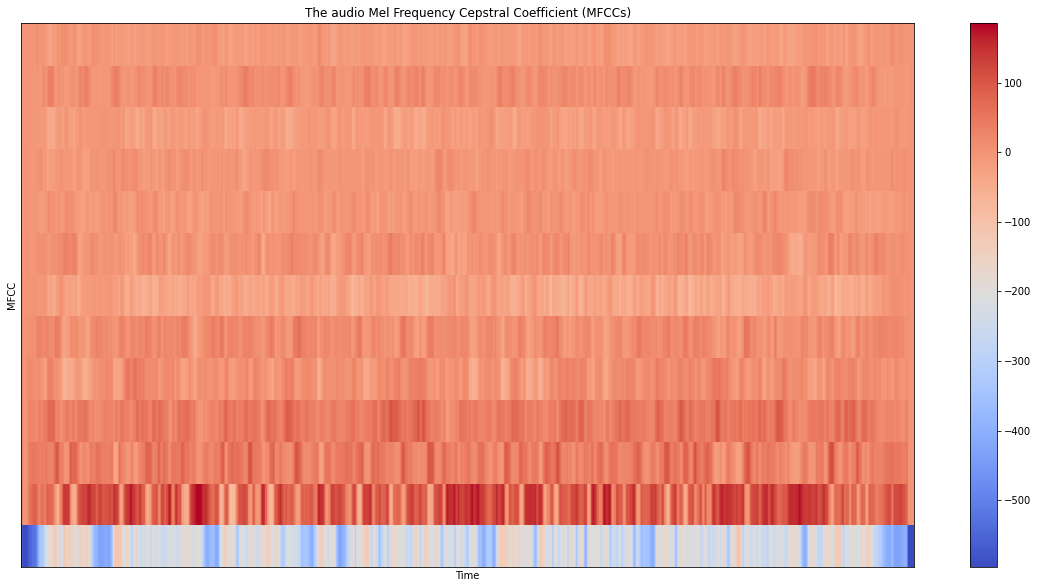

In [38]:
MFCCs = librosa.feature.mfcc(signal, n_fft=n_fft, hop_length=hop_length, n_mfcc=13)
plt.figure(figsize=(20, 10))

librosa.display.specshow(MFCCs, sr=sr, hop_length=hop_length)

plt.xlabel("Time")
plt.ylabel("MFCC")
plt.title("The audio Mel Frequency Cepstral Coefficient (MFCCs)")
plt.colorbar()
plt.show()